In [22]:
import numpy as np
from scipy.stats import wilcoxon
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# transcribed from the paper
results = {
    "Adult": {
        "CatBoost": "0.270 / 0.127",
        "LightGBM": "+2.4% / +1.9%",
        "XGBoost": "+2.2% / +1.0%",
    },
    "Amazon": {
        "CatBoost": "0.139 / 0.044",
        "LightGBM": "+17% / +21%",
        "XGBoost": "+17% / +21%",
    },
    "Click": {
        "CatBoost": "0.392 / 0.156",
        "LightGBM": "+1.2% / +1.2%",
        "XGBoost": "+1.2% / +1.2%",
    },
    "Epsilon": {
        "CatBoost": "0.265 / 0.109",
        "LightGBM": "+1.5% / +4.1%",
        "XGBoost": "+11% / +12%",
    },
    "Appetency": {
        "CatBoost": "0.072 / 0.018",
        "LightGBM": "+0.4% / +0.2%",
        "XGBoost": "+0.4% / +0.7%",
    },
    "Churn": {
        "CatBoost": "0.232 / 0.072",
        "LightGBM": "+0.1% / +0.6%",
        "XGBoost": "+0.5% / +1.6%",
    },
    "Internet": {
        "CatBoost": "0.209 / 0.094",
        "LightGBM": "+6.8% / +8.6%",
        "XGBoost": "+7.9% / +8.0%",
    },
    "Upselling": {
        "CatBoost": "0.166 / 0.049",
        "LightGBM": "+0.3% / +0.1%",
        "XGBoost": "+0.04% / +0.3%",
    },
    "Kick": {
        "CatBoost": "0.286 / 0.095",
        "LightGBM": "+3.5% / +4.4%",
        "XGBoost": "+3.2% / +4.1%",
    },
}

In [15]:
full_results = defaultdict(dict)

for k, v in results.items():
    string = v["CatBoost"]
    log_loss, zero_one_loss = list(map(float, string.split(" / ")))

    full_results[k]["CatBoost"] = {
        "log_loss": log_loss,
        "zero_one_loss": zero_one_loss,
    }

    for model in ["LightGBM", "XGBoost"]:
        log_mod, zero_mod = v[model].split(" / ")
        log_mod, zero_mod = [float(k[1:-1]) / 100 for k in [log_mod, zero_mod]]

        full_results[k][model] = {
            "log_loss": log_loss * (1 + log_mod),
            "zero_one_loss": zero_one_loss * (1 + zero_mod),
        }

full_results = dict(full_results)

Zero-One Loss: CatBoost vs LightGBM p-value: 0.002
Zero-One Loss: CatBoost vs XGBoost p-value: 0.002


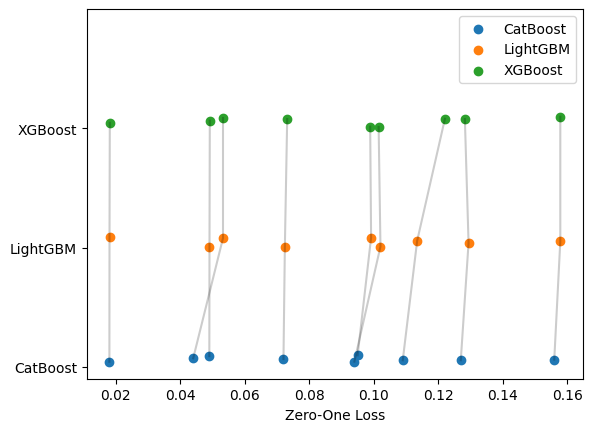

In [46]:
lst_zo = defaultdict(list)
lst_ll = defaultdict(list)

for ds_name, models in full_results.items():
    for model, metrics in models.items():
        lst_zo[model].append(metrics["zero_one_loss"])
        lst_ll[model].append(metrics["log_loss"])

lst_zo = dict(lst_zo)
lst_ll = dict(lst_ll)

n_samples = len(lst_zo["CatBoost"])

np.random.seed(0)
jitter = np.random.uniform(0, 0.1, size=(3, n_samples))

for i, (model, metrics) in enumerate(lst_zo.items()):
    plt.scatter(metrics, jitter[i] + i, label=model)

for i in range(n_samples):
    model_res = [lst_zo[model][i] for model in lst_zo]
    plt.plot(model_res, range(3) + jitter[:, i], color="black", alpha=0.2)

plt.ylim(-0.1, 3)

plt.yticks(range(len(lst_zo)), lst_zo.keys())
plt.xlabel("Zero-One Loss")
plt.legend()

for model in ["LightGBM", "XGBoost"]:
    p_val = wilcoxon(lst_zo["CatBoost"], lst_zo[model], alternative="less").pvalue
    print(f"Zero-One Loss: CatBoost vs {model} p-value: {p_val:.3f}")


plt.show()